In [1]:
!python --version
!conda info

Python 3.12.0

     active environment : subba
    active env location : /home2/akshett.jindal/miniconda3/envs/subba
            shell level : 2
       user config file : /home2/akshett.jindal/.condarc
 populated config files : /home2/akshett.jindal/.condarc
          conda version : 23.9.0
    conda-build version : not installed
         python version : 3.11.5.final.0
       virtual packages : __archspec=1=x86_64
                          __glibc=2.27=0
                          __linux=4.15.0=0
                          __unix=0=0
       base environment : /home2/akshett.jindal/miniconda3  (writable)
      conda av data dir : /home2/akshett.jindal/miniconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/linux-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/linux-64
                          https://repo.anaconda.com/pkgs/r/noarch
          packa

In [2]:
# !mkdir /scratch/akshett.jindal
# !chmod -R 700 /scratch/akshett.jindal
# !scp -r ada:/share1/akshett.jindal/nsddata_stimuli /scratch/akshett.jindal/

In [28]:
!pip install -q h5py matplotlib numpy tqdm

In [29]:
import h5py
from PIL import Image
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [4]:
base_directory = "/scratch/akshett.jindal/nsddataset_stimuli/stimuli/nsd"

In [5]:
dataset_filepath = f"{base_directory}/nsd_stimuli.hdf5"
image_dataset = h5py.File(dataset_filepath, "r")

In [6]:
image_dataset.keys()

<KeysViewHDF5 ['imgBrick']>

In [7]:
len(image_dataset['imgBrick'])

73000

In [8]:
image_data = image_dataset['imgBrick']

In [ ]:
# image_data = np.array(image_data[:])

In [33]:
def save_stuff(save_to_this_file, data_objects_dict):
    failed = []
    with h5py.File(save_to_this_file+'.h5py', 'w') as hf:
        for k,v in data_objects_dict.items():
            try:
                hf.create_dataset(k,data=v)
                # print(f'saved {k} in h5py file')
            except:
                failed.append(k)
                print (f'failed to save {k} as h5py. will try pickle')
    for k in failed:
        with open(save_to_this_file + '_' + f'{k}.pkl', 'w') as pkl:
            try:
                pickle.dump(data_objects_dict[k],pkl)
                # print (f'saved {k} as pkl')
            except:
                print (f'failed to save {k} in any format. lost.')

In [22]:
def resize_image_tensor(x, newsize):
    tt = x.transpose((1, 2, 0))
    return np.asarray(Image.fromarray(tt).resize(newsize, resample=Image.BILINEAR)) # .transpose((2, 0, 1))
    # r = np.ndarray(shape=x.shape[:1]+newsize+(x.shape[1],), dtype=tt.dtype)
    # for i, t in enumerate(tt):
    #     r[i] = np.asarray(Image.fromarray(t).resize(newsize, resample=Image.BILINEAR))
    # return r.transpose((2, 0, 1))

  0%|          | 0/73000 [00:00<?, ?it/s]

(425, 425, 3)


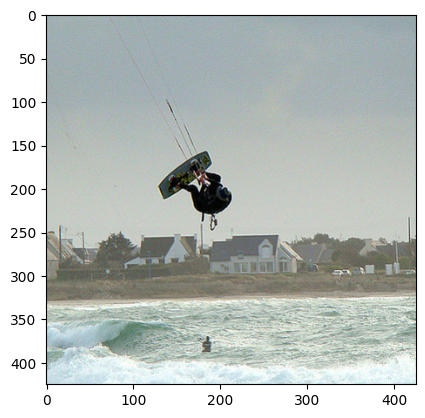

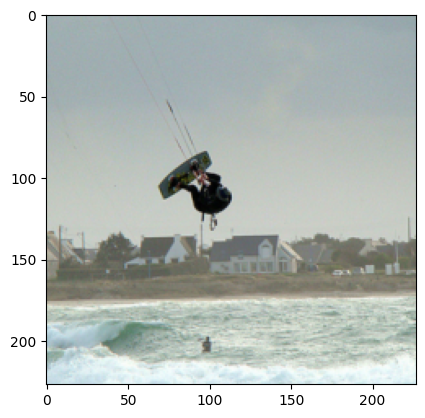

  0%|          | 0/73000 [00:00<?, ?it/s]


In [36]:
nx = 227
for i in tqdm(range(len(image_data))):
    image = image_data[i]
    # print(image.shape)
    # plt.imshow(image)
    # plt.show()
    image = resize_image_tensor(
        image.transpose((2, 0, 1)),
        newsize=(nx, nx),
    )
    # plt.imshow(image)
    # plt.show()
    # print(image.shape)
    save_stuff(f"{}/downsampled/{i+1}_stimuli_{nx}", {'stimuli': image})